In [ ]:
## Data : https://openml.org/search?type=data&sort=runs&status=active&id=37

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [ ]:
import seaborn as sns

from sklearn.datasets import fetch_openml
import ssl
import certifi

import warnings

warnings.filterwarnings('ignore')

ssl._create_default_https_context = ssl._create_unverified_context
dataset = fetch_openml(data_id=37, as_frame=True)

df = dataset.frame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   preg    768 non-null    float64 
 1   plas    768 non-null    float64 
 2   pres    768 non-null    float64 
 3   skin    768 non-null    float64 
 4   insu    768 non-null    float64 
 5   mass    768 non-null    float64 
 6   pedi    768 non-null    float64 
 7   age     768 non-null    float64 
 8   class   768 non-null    category
dtypes: category(1), float64(8)
memory usage: 49.0 KB


In [ ]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,tested_positive
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,tested_negative
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,tested_positive
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,tested_negative
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,tested_positive


In [ ]:
df_orig = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
le = LabelEncoder()

# Fit and transform the binary column
df['class'] = le.fit_transform(df['class'])

# Print the mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'tested_negative': 0, 'tested_positive': 1}


In [ ]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [ ]:
df.head().T

,0,1,2,3,4
preg,6.000,1.000,8.000,1.000,0.000
plas,148.000,85.000,183.000,89.000,137.000
pres,72.000,66.000,64.000,66.000,40.000
skin,35.000,29.000,0.000,23.000,35.000
insu,0.000,0.000,0.000,94.000,168.000
mass,33.600,26.600,23.300,28.100,43.100
pedi,0.627,0.351,0.672,0.167,2.288
age,50.000,31.000,32.000,21.000,33.000
class,1.000,0.000,1.000,0.000,1.000


In [ ]:
## EDA
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

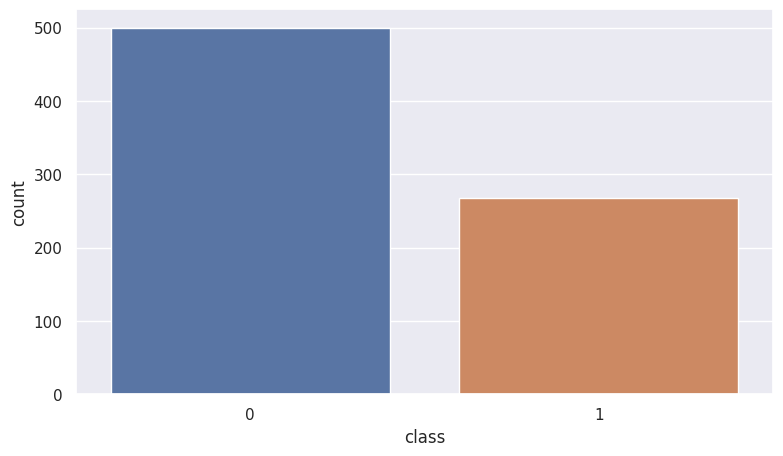

In [ ]:
sns.set()
sns.set(rc = {'figure.figsize':(9,5)})
sns.countplot(x="class",data=df)

In [ ]:
# from sklearn.model_selection import train_test_split
# df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
# ## True training dataset, remaining validation dataset
# df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)
# y_train=df_train.churn.values
# y_val=df_val.churn.values
# del df_train['churn']
# del df_val['churn']

# AGE_BUCKETS = 10
# age_labels = [f'age_{x}' for x in range(AGE_BUCKETS)]
# df['age_bucket']=pd.qcut(df['age'],AGE_BUCKETS, labels = age_labels)
# df['age_bucket'].value_counts()

df['age'].unique()

array([50., 31., 32., 21., 33., 30., 26., 29., 53., 54., 34., 57., 59.,
       51., 27., 41., 43., 22., 38., 60., 28., 45., 35., 46., 56., 37.,
       48., 40., 25., 24., 58., 42., 44., 39., 36., 23., 61., 69., 62.,
       55., 65., 47., 52., 66., 49., 63., 67., 72., 81., 64., 70., 68.])

In [ ]:
# AGE_BUCKETS = 3
# age_labels = [f'age_{x}' for x in range(AGE_BUCKETS)]
# df['age_bucket']=pd.qcut(df['age'],AGE_BUCKETS, labels = age_labels)
# df['age_bucket'].value_counts()

In [ ]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [ ]:
df['pedi'].value_counts()

0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: pedi, Length: 517, dtype: int64

<Axes: >

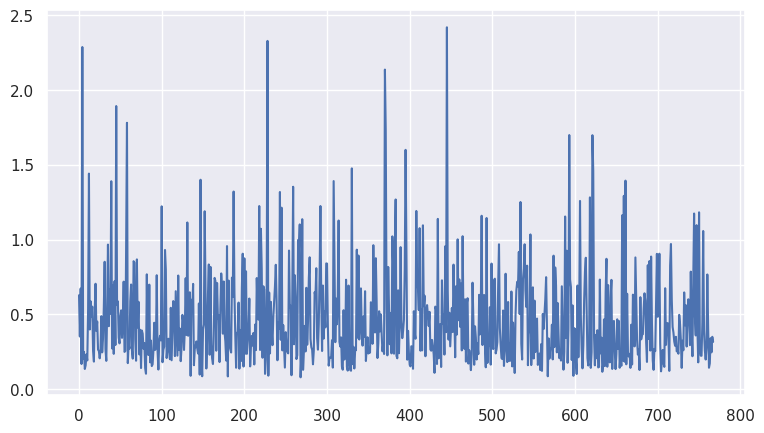

In [ ]:
df['pedi'].plot()

           preg      plas      pres      skin      insu      mass      pedi  \
preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
insu  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            age     class  
preg   0.544341  0.221898  
plas   0.263514  0.466581  
pres   0.239528  0.065068  
skin  -0.113970  0.074752  
insu  -0.042163  0.130548  
mass   0.036242  0.292695  
pedi   0.0335

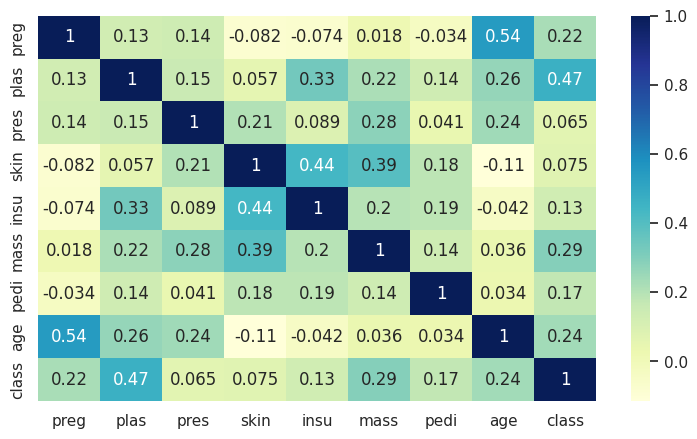

In [ ]:
print(df.corr())

# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
pyplot.show()

In [ ]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


<Axes: >

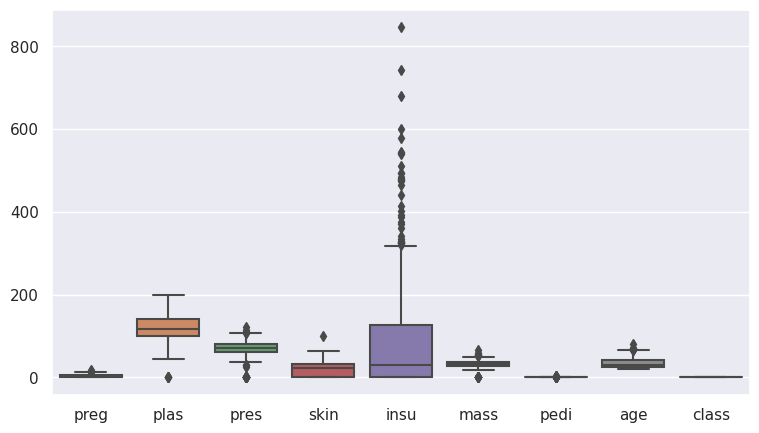

In [ ]:
sns.boxplot(data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    float64
 1   plas    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   insu    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
 8   class   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [ ]:
df.corrwith(df["class"])

preg     0.221898
plas     0.466581
pres     0.065068
skin     0.074752
insu     0.130548
mass     0.292695
pedi     0.173844
age      0.238356
class    1.000000
dtype: float64

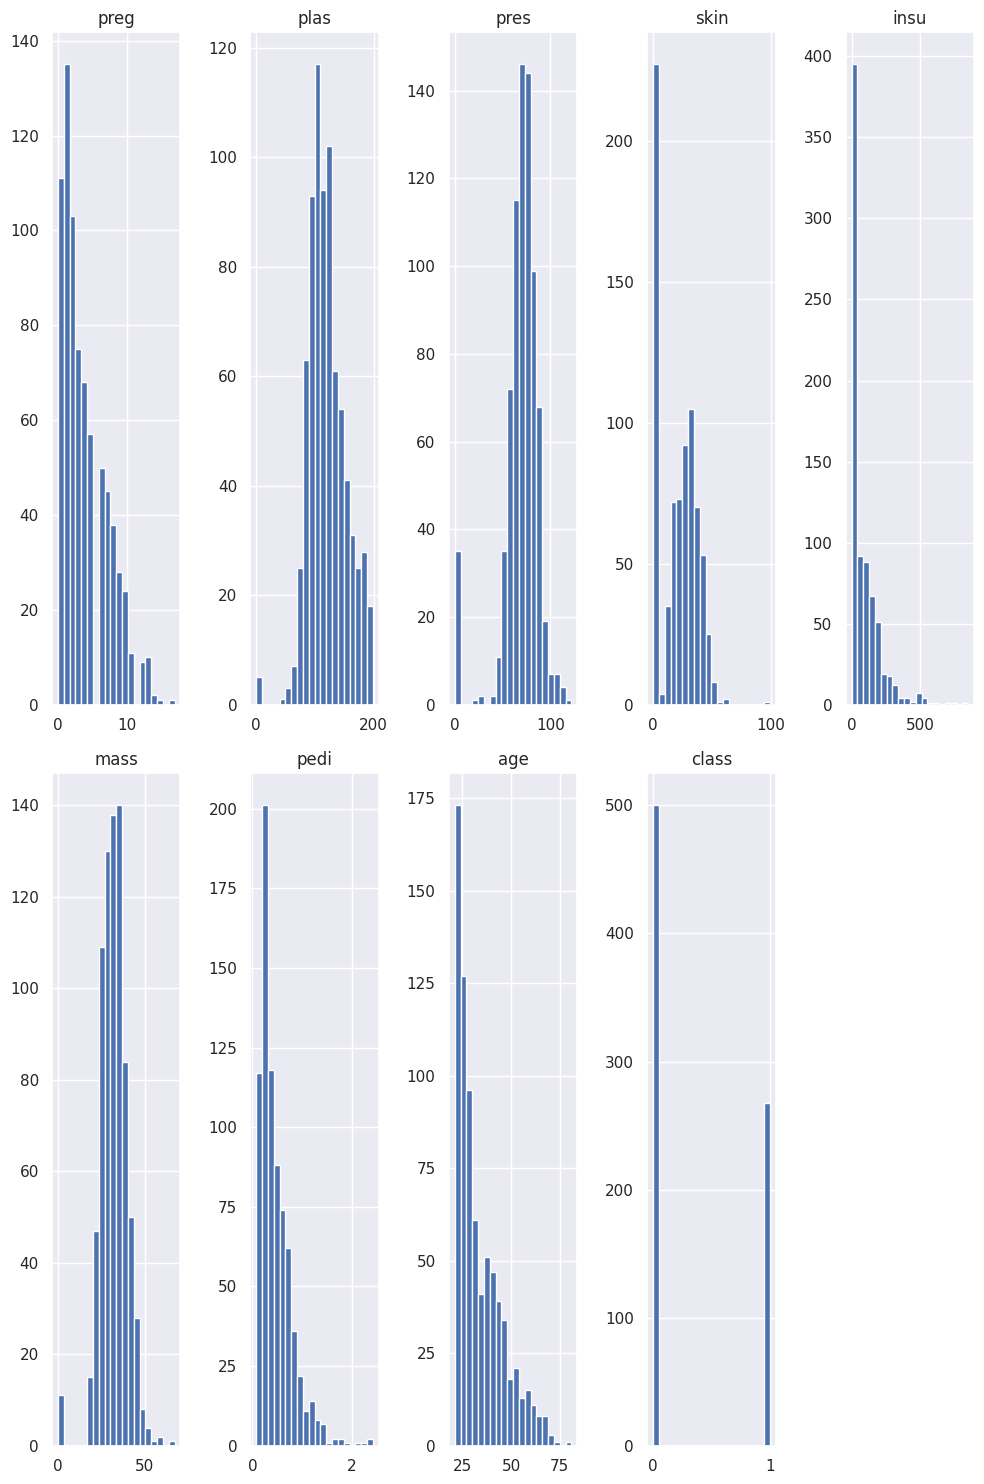

In [ ]:
# df.plot(lw=0,marker='.',markersize=1,subplots=True,layout=(-1,4),figsize = (15,30))
# pyplot.show()

df.hist(bins = 20, figsize =(10,15),layout=(-1,5))
pyplot.tight_layout()
pyplot.show()

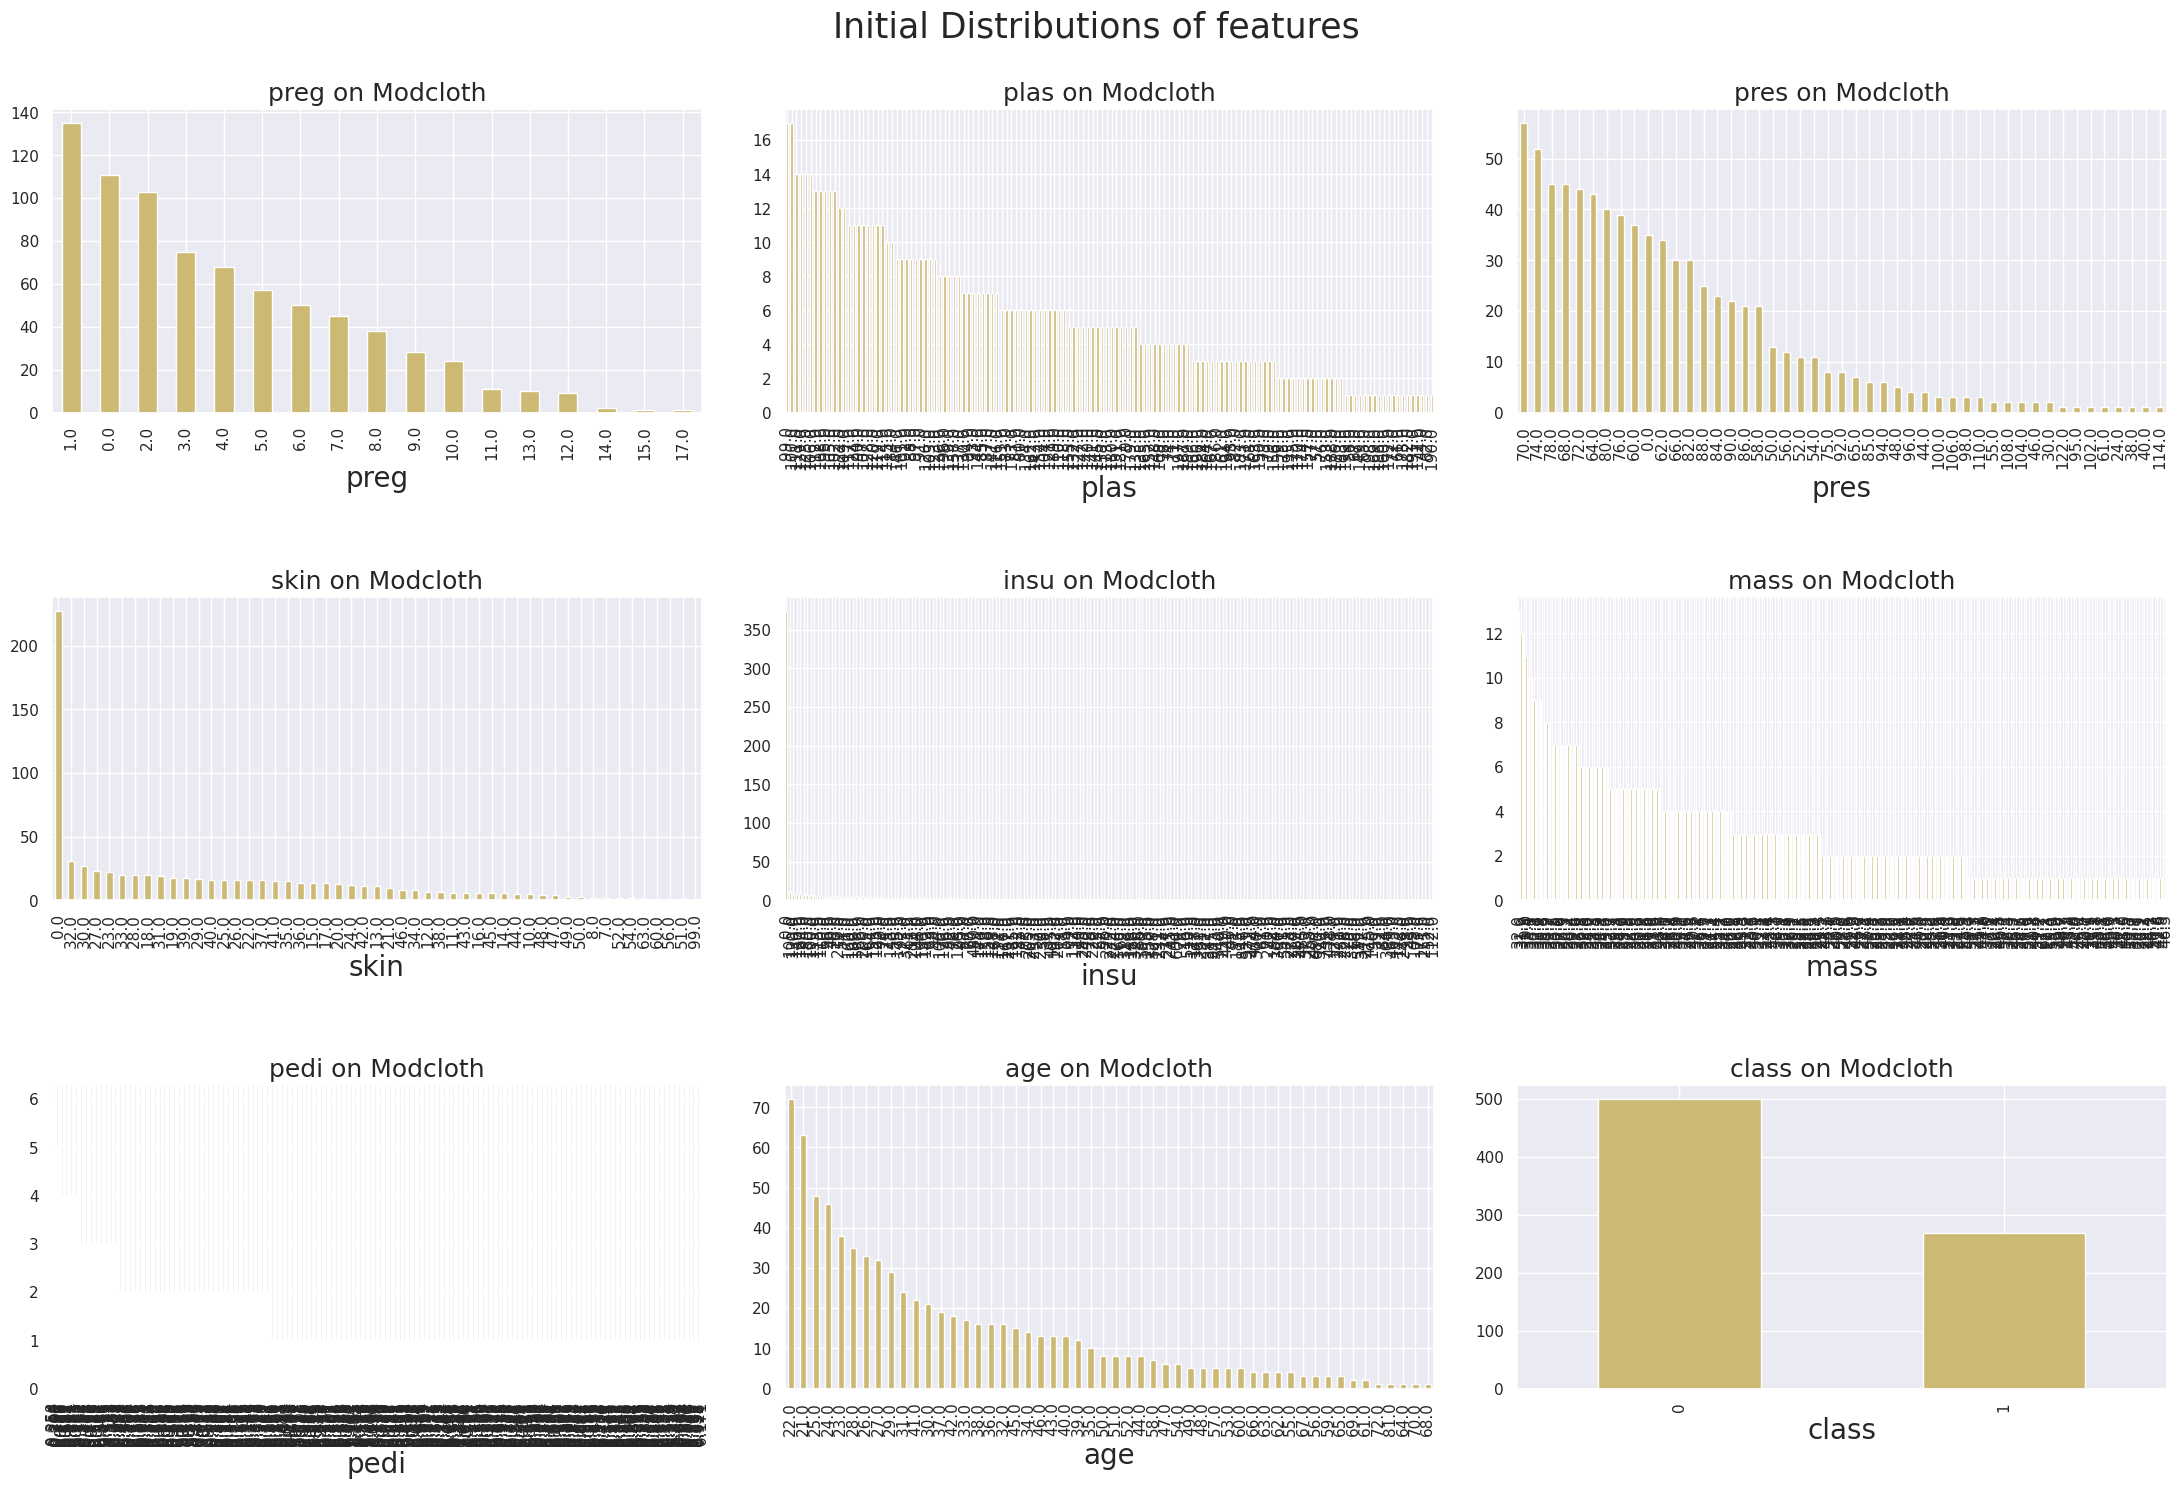

In [59]:
def plot_dist(col, ax):
    df[col][df[col].notnull()].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} ".format(col), fontsize= 18)
    return ax


f, ax = pyplot.subplots(3,3, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
# cols = ['bra_size','bust', 'category', 'cup_size', 'fit', 'height', 'hips', 'length', 'quality']
cols = df.columns
k = 0
for i in range(3):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = pyplot.suptitle("Initial Distributions of features", fontsize= 25)

In [60]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

print(scaler.fit(df))
MinMaxScaler()
# print(scaler.data_max_)
print("----")
print(scaler.transform(df))
print("*")
print(type(scaler.transform(df)))
# print(scaler.transform([[2, 2]]))

MinMaxScaler()
----
[[0.35294118 0.74371859 0.59016393 ... 0.23441503 0.48333333 1.        ]
 [0.05882353 0.42713568 0.54098361 ... 0.11656704 0.16666667 0.        ]
 [0.47058824 0.91959799 0.52459016 ... 0.25362938 0.18333333 1.        ]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.07130658 0.15       0.        ]
 [0.05882353 0.63316583 0.49180328 ... 0.11571307 0.43333333 1.        ]
 [0.05882353 0.46733668 0.57377049 ... 0.10119556 0.03333333 0.        ]]
*
<class 'numpy.ndarray'>


In [69]:
# df_tr = to_dataframe(scaler.transform(df)

AttributeError: ignored

In [71]:


df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [72]:
X = df_scaled.drop(['class'], axis=1)
y = df_scaled['class']
X.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('SGD', SGDClassifier()))
models.append(('Ridge', RidgeClassifier()))
models.append(('PAC', PassiveAggressiveClassifier()))
models.append(('Perceptron', Perceptron()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NearestCentroid', NearestCentroid()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ExtraTree', ExtraTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('BNB', BernoulliNB()))
models.append(('ComplementNB', ComplementNB()))
models.append(('MultinomialNB', MultinomialNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('NuSVC', NuSVC()))
models.append(('LinearSVC', LinearSVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ExtraTrees', ExtraTreesClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')))

LR: 0.739582 (0.043146)
Score for each of the 10 K-fold tests:  [0.75806452 0.74193548 0.64516129 0.70967742 0.78688525 0.72131148
 0.78688525 0.70491803 0.78688525 0.75409836]
LogisticRegression(solver='liblinear')
	Training time: 0.007s
	Prediction time: 0.091s

SGD: 0.731333 (0.055984)
Score for each of the 10 K-fold tests:  [0.79032258 0.77419355 0.61290323 0.70967742 0.75409836 0.73770492
 0.80327869 0.6557377  0.73770492 0.73770492]
SGDClassifier()
	Training time: 0.006s
	Prediction time: 0.096s

Ridge: 0.750925 (0.041603)
Score for each of the 10 K-fold tests:  [0.75806452 0.77419355 0.64516129 0.75806452 0.78688525 0.73770492
 0.80327869 0.72131148 0.7704918  0.75409836]
RidgeClassifier()
	Training time: 0.036s
	Prediction time: 0.265s

PAC: 0.719989 (0.081671)
Score for each of the 10 K-fold tests:  [0.62903226 0.59677419 0.83870968 0.74193548 0.75409836 0.62295082
 0.81967213 0.68852459 0.80327869 0.70491803]
PassiveAggressiveClassifier()
	Training time: 0.004s
	Prediction ti

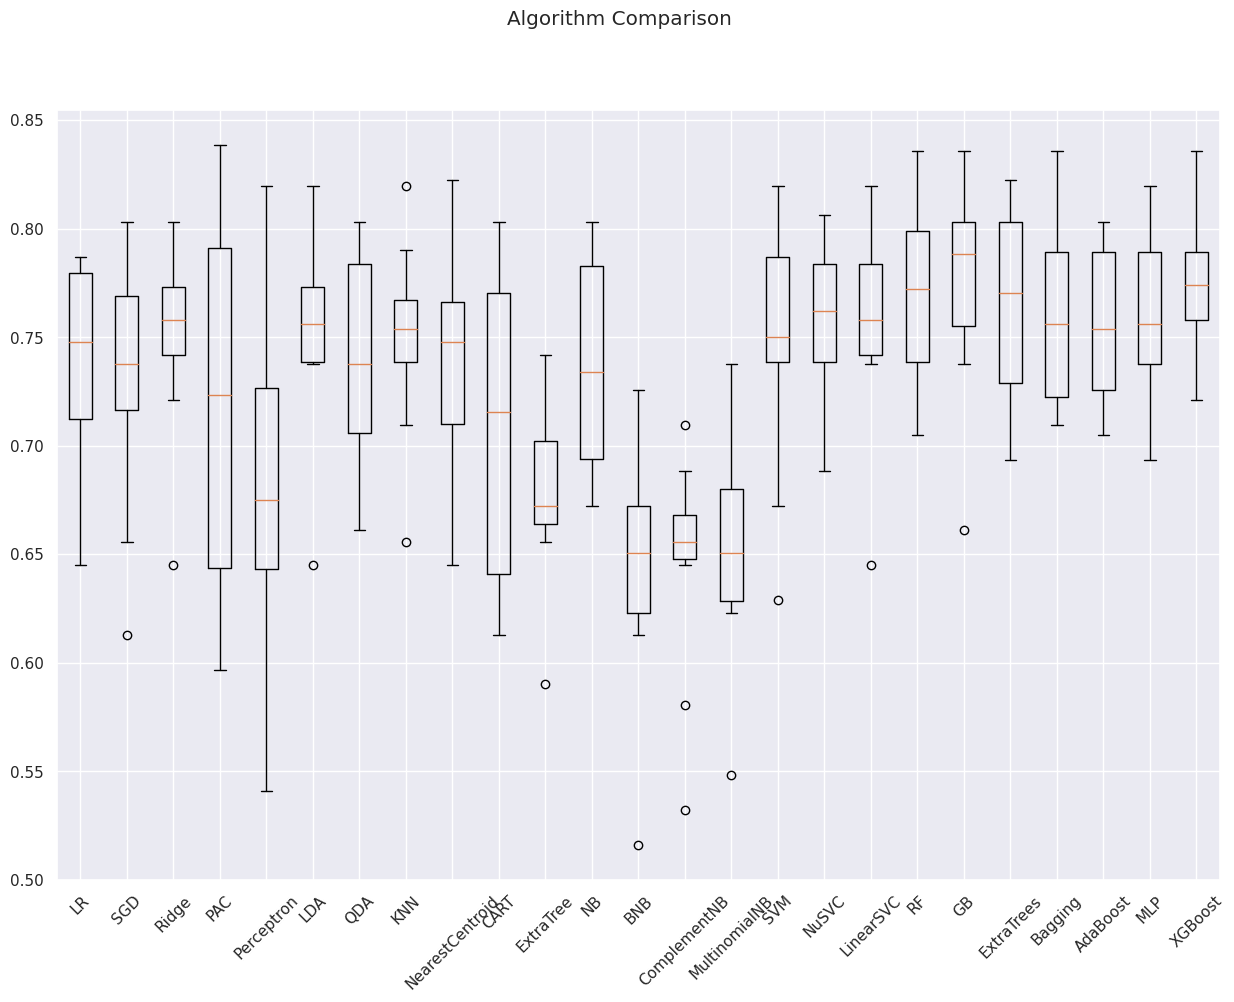

In [75]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time() - start
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print()

fig = pyplot.figure(figsize=(15, 10))  # Change the numbers as needed
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names, rotation = 45)  # Added rotation for better visibility
pyplot.show()

# Log Reg

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [78]:
model.intercept_[0]

-4.290698695264556

In [84]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0.])

In [86]:
coef = model.coef_
coef

array([[ 0.83999484,  3.69878274, -1.06857048,  0.19943489, -0.12623475,
         2.59755389,  0.98783049,  1.70362668]])